In [24]:
from statsforecast import StatsForecast
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
itc_df = pd.read_csv("ITC_2024.csv")
itc_test = pd.read_csv("ITC_Test.csv")

In [26]:
itc_df

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [27]:
# -------------------------------------
# Creating test train validation set 
# -------------------------------------
filter_date = '2022-03-28'

itc_filtered = itc_df[itc_df['date']>=filter_date]

In [28]:
itc_filtered.columns

Index(['date', 'series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close',
       'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades'],
      dtype='object')

In [29]:
# -------------------------------------
# Creating filtered set into required format and retaining date column for train val split
# -------------------------------------

itc_filtered = itc_filtered[['date','close']]
itc_filtered['unique_id'] = 1
itc_filtered['ds'] = itc_filtered['date']
itc_filtered.rename(columns={
    'close':'y'}, inplace=True
)
itc_filtered

,date,y,unique_id,ds
5482,2022-03-28,257.05,1,2022-03-28
5483,2022-03-29,254.60,1,2022-03-29
5484,2022-03-30,249.20,1,2022-03-30
5485,2022-03-31,250.65,1,2022-03-31
5486,2022-04-01,253.30,1,2022-04-01
...,...,...,...,...
5976,2024-03-21,421.25,1,2024-03-21
5977,2024-03-22,428.60,1,2024-03-22
5978,2024-03-26,427.65,1,2024-03-26
5979,2024-03-27,428.00,1,2024-03-27


In [30]:
train_val_date_split = '2024-03-01'

itc_train = itc_filtered[itc_filtered['date']<train_val_date_split]
itc_train

itc_train['date'] = pd.to_datetime(itc_train['date'])


C:\Users\user\AppData\Local\Temp\ipykernel_30816\117226567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_train['date'] = pd.to_datetime(itc_train['date'])


In [31]:
itc_val = itc_filtered[itc_filtered['date']>=train_val_date_split]
itc_val['date'] = pd.to_datetime(itc_val['date'])
itc_val

C:\Users\user\AppData\Local\Temp\ipykernel_30816\2576704961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_val['date'] = pd.to_datetime(itc_val['date'])


,date,y,unique_id,ds
5962,2024-03-01,409.50,1,2024-03-01
5963,2024-03-02,412.05,1,2024-03-02
5964,2024-03-04,409.10,1,2024-03-04
5965,2024-03-05,406.15,1,2024-03-05
5966,2024-03-06,407.85,1,2024-03-06
5967,2024-03-07,413.55,1,2024-03-07
5968,2024-03-11,409.40,1,2024-03-11
5969,2024-03-12,404.45,1,2024-03-12
5970,2024-03-13,422.45,1,2024-03-13
5971,2024-03-14,419.65,1,2024-03-14


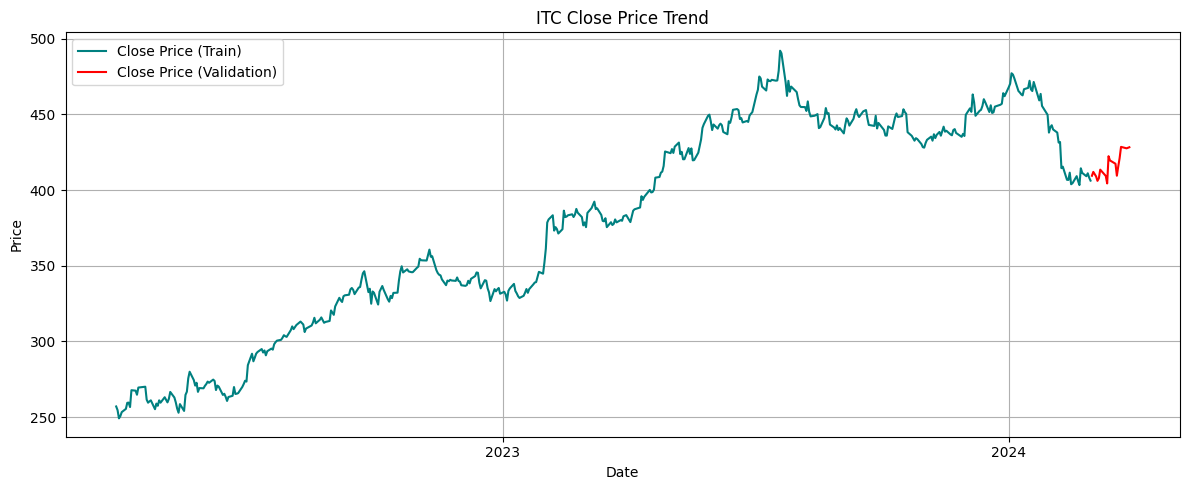

In [32]:
import matplotlib.dates as mdates


# Plot
plt.figure(figsize=(12, 5))
plt.plot(itc_train['date'], itc_train['y'], label=f'{'close'.title()} Price (Train)', color='teal')
plt.plot(itc_val['date'],itc_val['y'],label=f'{'close'.title()} Price (Validation)', color='red')

# Format x-axis to show years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())           # Tick every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title(f'ITC {'close'.title()} Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# -------------------------------------
# Creating statsmodels object
# -------------------------------------

# itc_train = itc_train.drop(columns=['date'])

# Sort by date
itc_train = itc_train.sort_values('date')

# Create row number (starting from 1)
itc_train['ds'] = range(1, len(itc_train) + 1)

itc_train = itc_train[['unique_id','ds','y']]


In [ ]:
from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    AutoRegressive,
    SimpleExponentialSmoothing,
    SeasonalExponentialSmoothing,
    Holt,
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive,
    RandomWalkWithDrift,
    WindowAverage,
    MSTL
)

# Create a list of models and instantiation parameters
models = [
    AutoARIMA(season_length=12),
    AutoETS(season_length=12),
    AutoRegressive(lags=12),
    SimpleExponentialSmoothing(alpha=0.5),
    SeasonalExponentialSmoothing(alpha=0.5, season_length=12),
    Holt(season_length=12),
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=12),
    HistoricAverage(),
    DOT(season_length=12),
    RandomWalkWithDrift(),
    WindowAverage(window_size=12),
    MSTL(season_length=12)
]

# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq=1, 
    fallback_model = SeasonalNaive(season_length=12),
    n_jobs=-1,
)

forecasts_df = sf.forecast(df=itc_train, h=5)
forecasts_df.head()

,unique_id,ds,AutoARIMA,AutoETS,AutoRegressive,SES,SeasonalES,Holt,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,RWD,WindowAverage,MSTL
0,1,481,406.611587,406.853348,406.514286,407.855516,432.767846,406.683507,411.55,416.239824,411.55,377.874375,406.351653,406.611587,408.295833,408.627387
1,1,482,406.923173,407.282116,406.031845,407.855516,425.838459,406.991886,403.90,416.239824,403.90,377.874375,405.452143,406.923173,408.295833,405.682545
2,1,483,407.234760,407.710883,406.504073,407.855516,427.346243,407.300266,404.60,416.239824,404.60,377.874375,406.107448,407.234760,408.295833,406.578244
3,1,484,407.546347,408.139651,406.426399,407.855516,430.732291,407.608645,409.25,416.239824,409.25,377.874375,406.088973,407.546347,408.295833,410.216547
4,1,485,407.857933,408.568419,406.408973,407.855516,428.915986,407.917025,406.10,416.239824,406.10,377.874375,404.728054,407.857933,408.295833,410.133805


In [35]:
itc_val

,date,y,unique_id,ds
5962,2024-03-01,409.50,1,2024-03-01
5963,2024-03-02,412.05,1,2024-03-02
5964,2024-03-04,409.10,1,2024-03-04
5965,2024-03-05,406.15,1,2024-03-05
5966,2024-03-06,407.85,1,2024-03-06
5967,2024-03-07,413.55,1,2024-03-07
5968,2024-03-11,409.40,1,2024-03-11
5969,2024-03-12,404.45,1,2024-03-12
5970,2024-03-13,422.45,1,2024-03-13
5971,2024-03-14,419.65,1,2024-03-14
